# Marvel analyzes - Cost x Revenue

In [47]:
# environment setup
!pip install seaborn==0.9.0
import seaborn as sns
import pandas as pd

df_movies = pd.read_csv('data/tmdb_5000_movies.csv')
df_movies.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [48]:
# identify marvel movies
marvel_movies = df_movies.production_companies.str.contains('Marvel', regex=False)
df_marvel_movies = df_movies[marvel_movies]
df_marvel_movies = df_marvel_movies[["title", "budget", "popularity", "revenue", "vote_average", "vote_count"]]
df_marvel_movies

,title,budget,popularity,revenue,vote_average,vote_count
5,Spider-Man 3,258000000,115.699814,890871626,5.9,3576
7,Avengers: Age of Ultron,280000000,134.279229,1405403694,7.3,6767
16,The Avengers,220000000,144.448633,1519557910,7.4,11776
20,The Amazing Spider-Man,215000000,89.866276,752215857,6.5,6586
26,Captain America: Civil War,250000000,198.372395,1153304495,7.1,7241
30,Spider-Man 2,200000000,35.149586,783766341,6.7,4321
31,Iron Man 3,200000000,77.682080,1215439994,6.8,8806
33,X-Men: The Last Stand,210000000,3.857526,459359555,6.3,3525
38,The Amazing Spider-Man 2,200000000,89.270217,705717432,6.5,4179
46,X-Men: Days of Future Past,250000000,118.078691,747862775,7.5,6032


In [49]:
# sort by highest to lowest revenue
df_marvel_movies = df_marvel_movies.sort_values(by = ["budget"], ascending=False)
df_marvel_movies

,title,budget,popularity,revenue,vote_average,vote_count
7,Avengers: Age of Ultron,280000000,134.279229,1405403694,7.3,6767
5,Spider-Man 3,258000000,115.699814,890871626,5.9,3576
26,Captain America: Civil War,250000000,198.372395,1153304495,7.1,7241
46,X-Men: Days of Future Past,250000000,118.078691,747862775,7.5,6032
16,The Avengers,220000000,144.448633,1519557910,7.4,11776
20,The Amazing Spider-Man,215000000,89.866276,752215857,6.5,6586
33,X-Men: The Last Stand,210000000,3.857526,459359555,6.3,3525
79,Iron Man 2,200000000,77.300194,623933331,6.6,6849
30,Spider-Man 2,200000000,35.149586,783766341,6.7,4321
31,Iron Man 3,200000000,77.682080,1215439994,6.8,8806


In [53]:
# create budge range
budget_range = [0, 100000000, 200000000, 300000000]
budget_labels = ["0M to 100M USD", "100M to 200M USD", "200M to 300M USD"]
budget_classified = pd.cut(df_marvel_movies["budget"], budget_range, labels= budget_labels)
pd.value_counts(budget_classified)

100M to 200M USD    22
0M to 100M USD       9
200M to 300M USD     7
Name: budget, dtype: int64

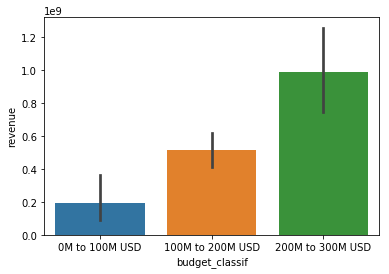

In [54]:
df_marvel_movies["budget_classif"] = budget_classified

# plot in a bar chart
sns.barplot(data = df_marvel_movies,
            x = df_marvel_movies["budget_classif"],
            y = df_marvel_movies["revenue"])

In [103]:
df_marvel_graph = df_marvel_movies[['title', 'budget_classif','budget', 'revenue']]

df_marvel_graph.loc[:, "profit"] = (df_marvel_graph.loc[:, "revenue"] - df_marvel_graph.loc[:,"budget"])
    
df_marvel_graph.head()

,title,budget_classif,budget,revenue,profit
7,Avengers: Age of Ultron,200M to 300M USD,280000000,1405403694,1125403694
5,Spider-Man 3,200M to 300M USD,258000000,890871626,632871626
26,Captain America: Civil War,200M to 300M USD,250000000,1153304495,903304495
46,X-Men: Days of Future Past,200M to 300M USD,250000000,747862775,497862775
16,The Avengers,200M to 300M USD,220000000,1519557910,1299557910


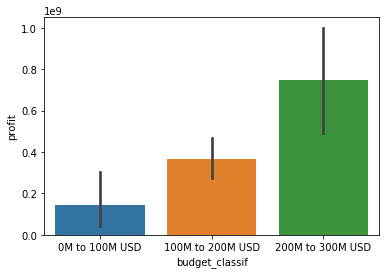

In [109]:
df_marvel_graph = df_marvel_graph.sort_values(by = "profit", ascending=False)
sns.barplot(data = df_marvel_graph,
            x = df_marvel_graph["budget_classif"],
            y = df_marvel_graph["profit"])